In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cluster data
cluster_0 = pd.read_csv('cluster_0.csv')
cluster_1 = pd.read_csv('cluster_1.csv')
cluster_2 = pd.read_csv('cluster_2.csv')

In [8]:
# Combine the data into one DataFra me for analysis
clusters = pd.concat([cluster_0, cluster_1, cluster_2])
clusters['Cluster'] = clusters['Cluster'].astype(int)
clusters

,Staff Number,Rank,Supervisor ID,Coordinator ID,FKGL,FRE,GFI,CLI,Completion_Rate,Assessment_Scores,VTRAC_Usage(hrs),Cluster
0,-1.186169,1.341434,-1.186169,-1.186169,-1.559639,1.427776,-0.816685,-2.498555,-1.472328,-1.171183,-0.371450,0
1,-1.169889,1.341434,-1.169889,-1.169889,-0.839629,0.759706,-0.729481,-0.929682,-0.818862,-0.382829,0.051455,0
2,-1.148414,-1.336072,-1.148414,-1.148414,0.208110,0.105972,0.417528,0.615286,-1.437935,-1.102631,-1.025030,0
3,-1.138715,0.448932,-1.138715,-1.138715,-1.500063,1.405345,-0.773083,-1.905267,0.453676,-1.205460,1.473954,0
4,-1.125553,1.341434,-1.125553,-1.125553,-1.500063,1.405345,-0.773083,-0.738533,-0.750076,-0.211448,0.013009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.688456,1.341434,1.688456,1.688456,2.045505,-2.311469,3.543548,0.418279,-1.369149,-0.280001,-1.332598,2
370,1.708200,0.448932,1.708200,1.708200,3.848077,-4.181092,3.543548,2.168380,0.797605,1.639470,-0.640571,2
371,1.709239,-0.443570,1.709239,1.709239,3.848077,-4.181092,3.543548,1.001646,1.072749,0.336972,-0.179220,2
372,1.715821,1.341434,1.715821,1.715821,2.105081,-2.333900,3.587150,1.886618,1.382285,-1.205460,0.974157,2


In [9]:
# Display descriptive statistics for each cluster
cluster_descriptions = clusters.groupby('Cluster').describe()
cluster_descriptions


# 1. Descriptive Statistics:
#- Cluster 0: This cluster has a higher mean `Completion_Rate` and `Assessment_Scores`, indicating a group of users who are more engaged and perform better.
#- Cluster 1: This cluster has average values for most features, suggesting typical users.
#- Cluster 2: This cluster has a higher `FKGL` and `CLI`, indicating users who prefer more complex text.


Staff Number                                                    \
               count      mean       std       min       25%       50%   
Cluster                                                                  
0             5915.0  0.644098  0.660996 -1.186169  0.134932  0.674942   
1             3697.0 -1.012020  0.458255 -1.731375 -1.400234 -1.058354   
2              374.0 -0.182900  1.000134 -1.726179 -1.055757 -0.296833   

                               Rank            ... Assessment_Scores  \
              75%       max   count      mean  ...               75%   
Cluster                                        ...                     
0        1.197460  1.731408  5915.0  0.049079  ...          0.885392   
1       -0.672138  0.427972  3697.0 -0.082175  ...          0.851116   
2        0.647145  1.722055   374.0  0.036090  ...          0.911099   

                  VTRAC_Usage(hrs)                                          \
              max            count      mean       std       min       25%   
Cluster                                                                      
0        1.708022           5915.0  0.004780  0.995971 -1.717057 -0.832801   
1        1.708022           3697.0 -0.002236  1.006139 -1.717057 -0.871247   
2        1.708022            374.0 -0.053500  1.005104 -1.717057 -0.909693   

                                       
              50%       75%       max  
Cluster                                
0        0.013009  0.858819  1.704629  
1        0.013009  0.858819  1.704629  
2       -0.121552  0.772316  1.666183  

[3 rows x 88 columns]

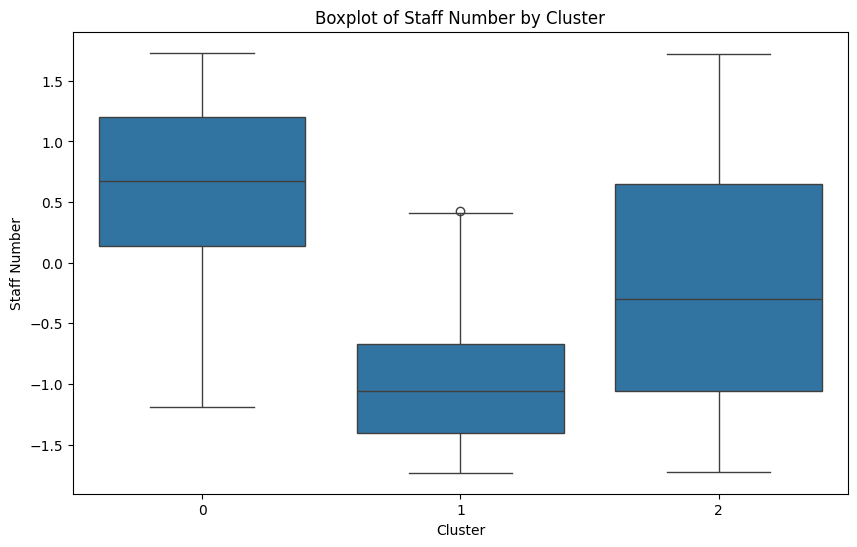

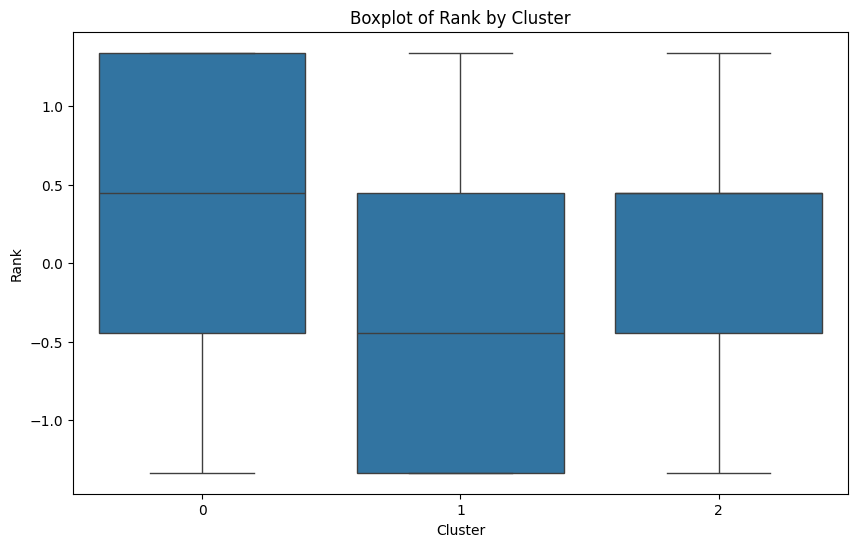

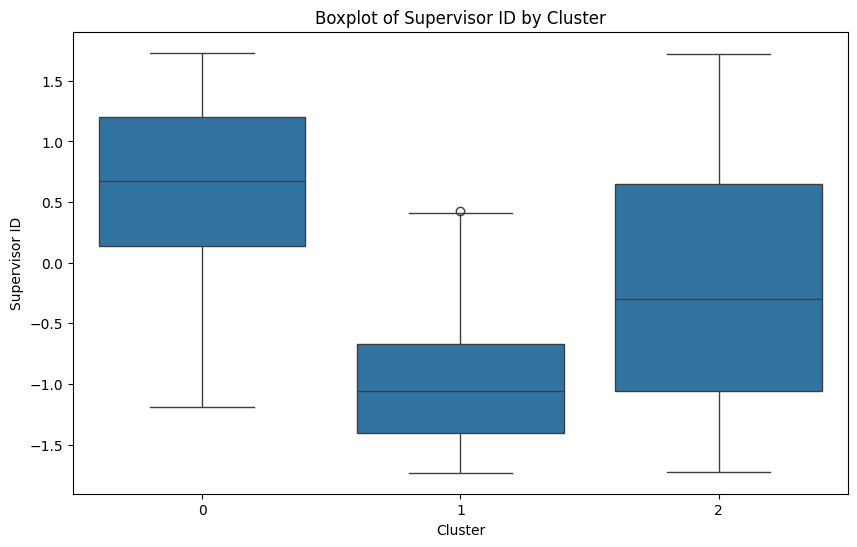

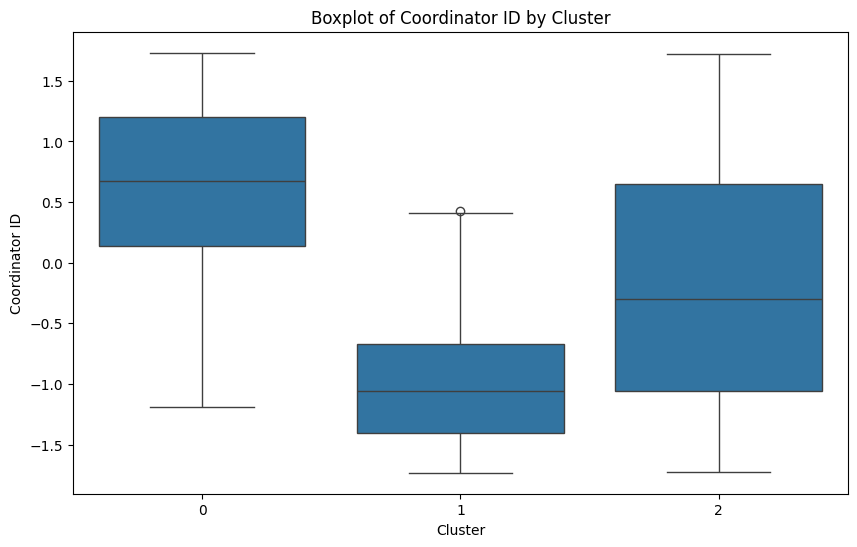

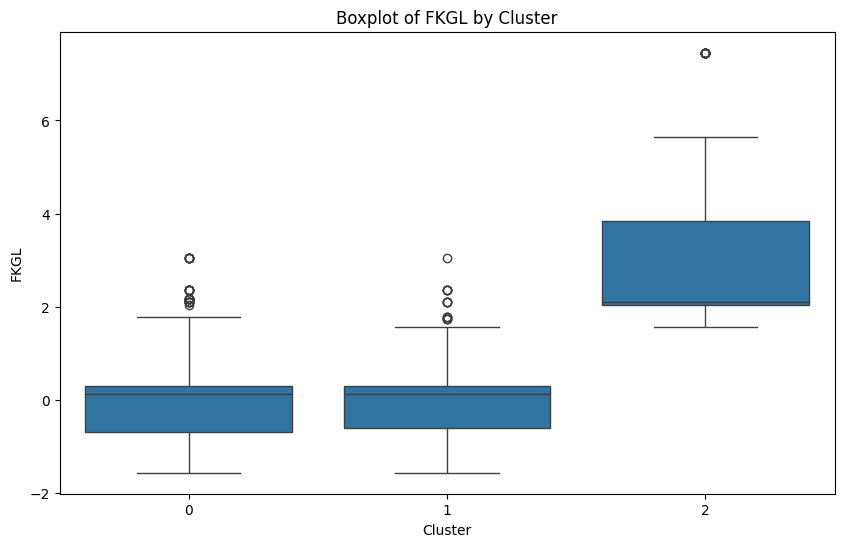

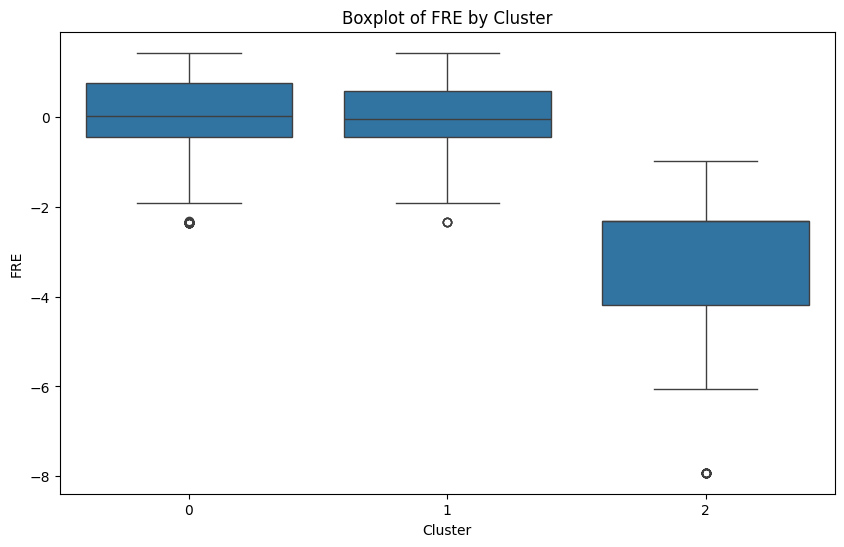

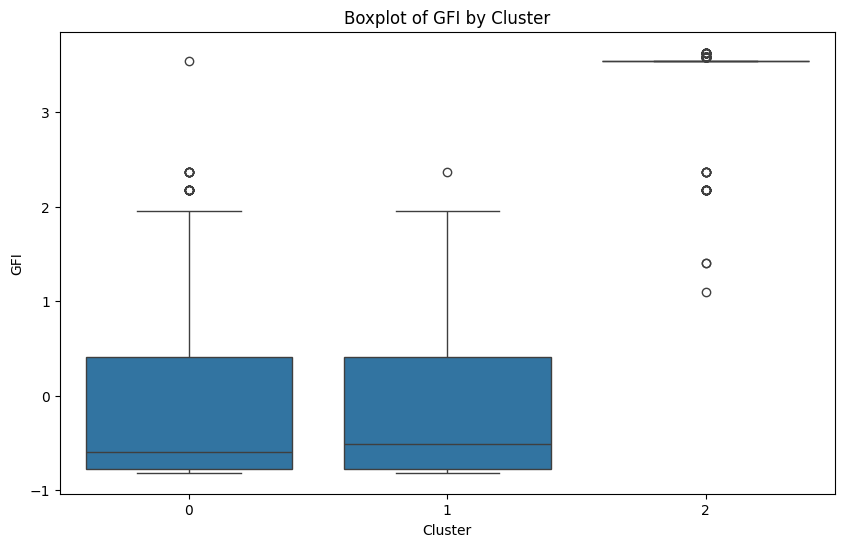

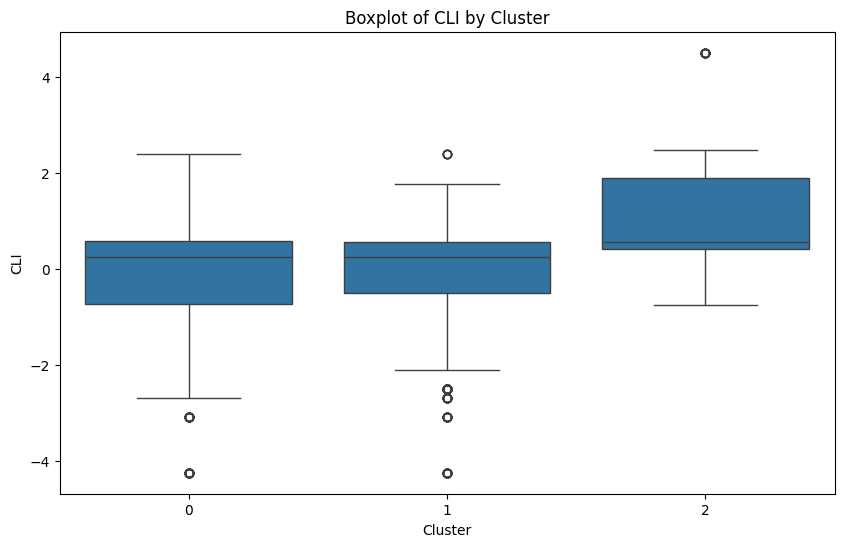

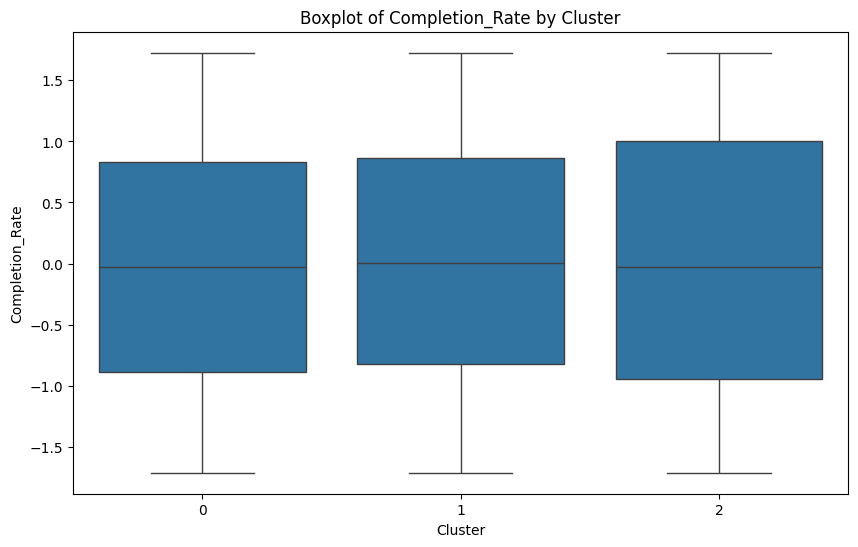

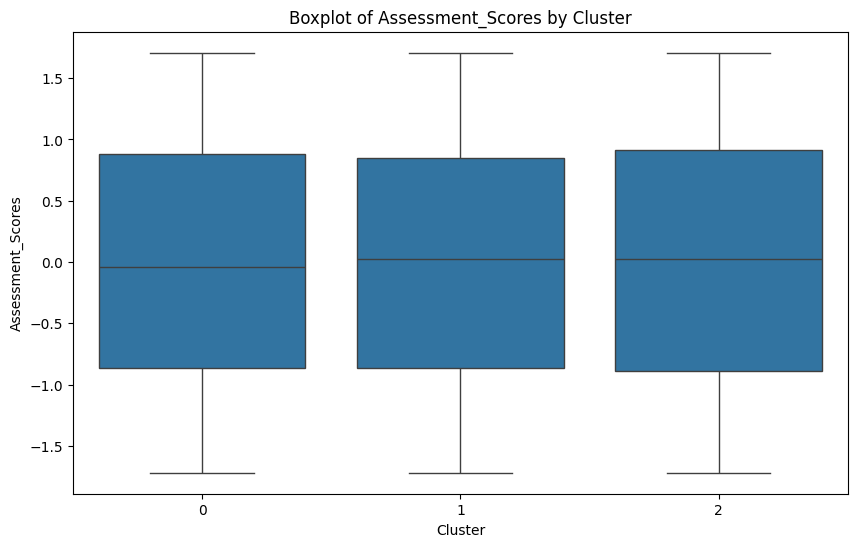

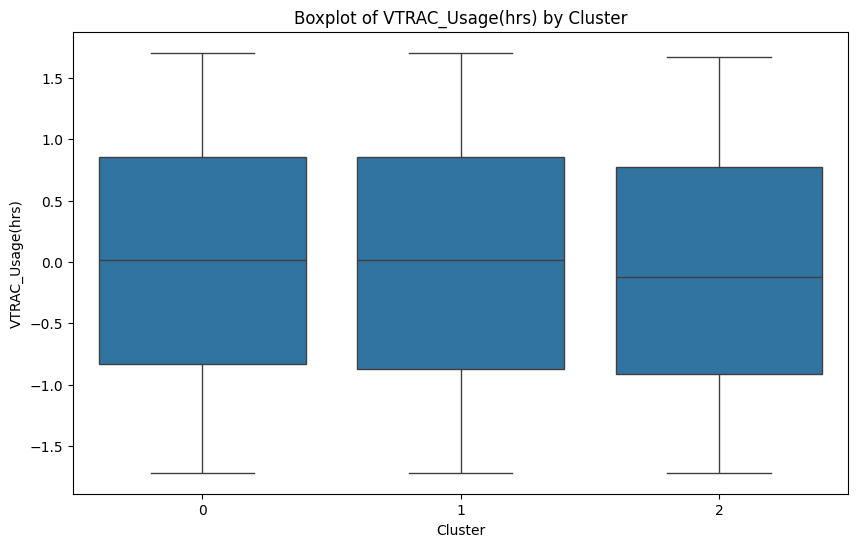

In [10]:
# Visualize the distribution of each feature in each cluster
features = clusters.columns[:-1]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=clusters)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

#2. Boxplots:
#- Feature `FKGL`: If Cluster 2 has significantly higher `FKGL`, it implies these users prefer content with higher readability levels.
#- Feature `VTRAC_Usage(hrs)`: If Cluster 0 shows a higher range and median, it might indicate that these users spend more time on the platform.

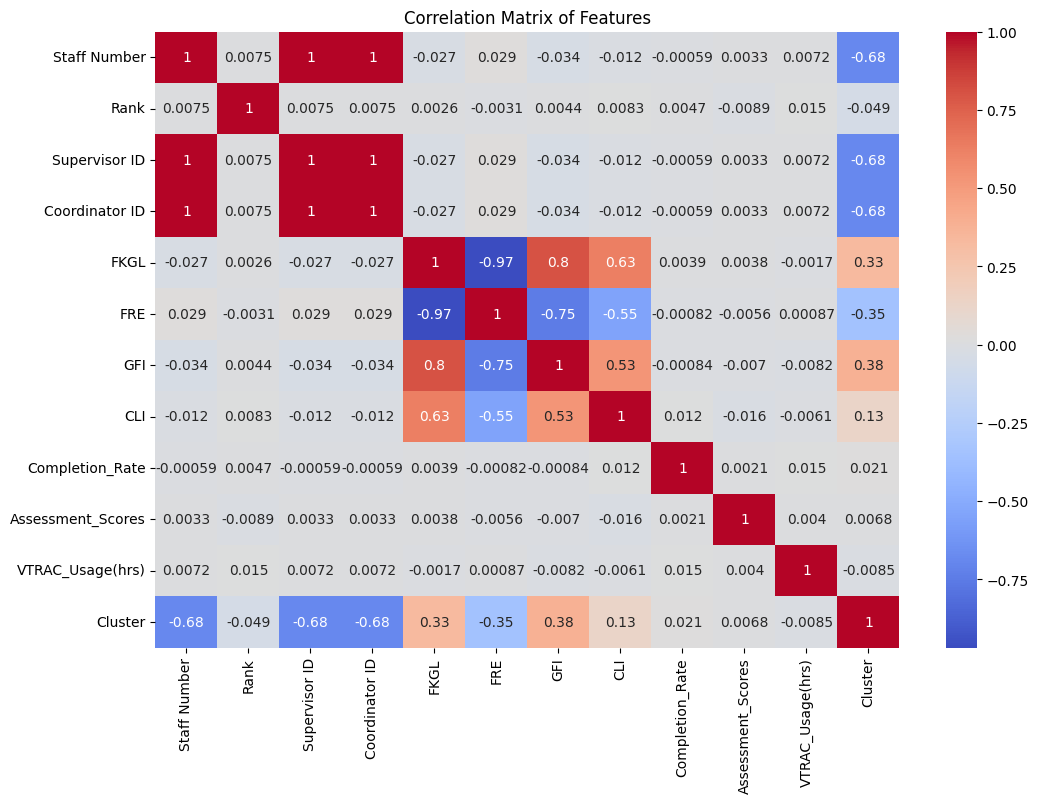

In [11]:
# Correlation matrix
corr = clusters.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

#3. Correlation Matrix:
#- High correlation between `Completion_Rate` and `Assessment_Scores` in all clusters suggests that users who complete more modules also tend to score higher.
#- If `FKGL` and `VTRAC_Usage(hrs)` are positively correlated in Cluster 2, it might indicate that users who prefer complex text spend more time using the platform.

In [12]:
# Calculate mean values of each feature for each cluster
cluster_means = clusters.groupby('Cluster').mean()
display(cluster_means)

,Staff Number,Rank,Supervisor ID,Coordinator ID,FKGL,FRE,GFI,CLI,Completion_Rate,Assessment_Scores,VTRAC_Usage(hrs)
Cluster,,,,,,,,,,,
0,0.644098,0.049079,0.644098,0.644098,-0.128651,0.136542,-0.143412,-0.047994,-0.018847,-0.004689,0.004780
1,-1.012020,-0.082175,-1.012020,-1.012020,-0.090972,0.103240,-0.120631,-0.040634,0.027416,0.004575,-0.002236
2,-0.182900,0.036090,-0.182900,-0.182900,2.933941,-3.180015,3.460582,1.160715,0.027075,0.028944,-0.053500


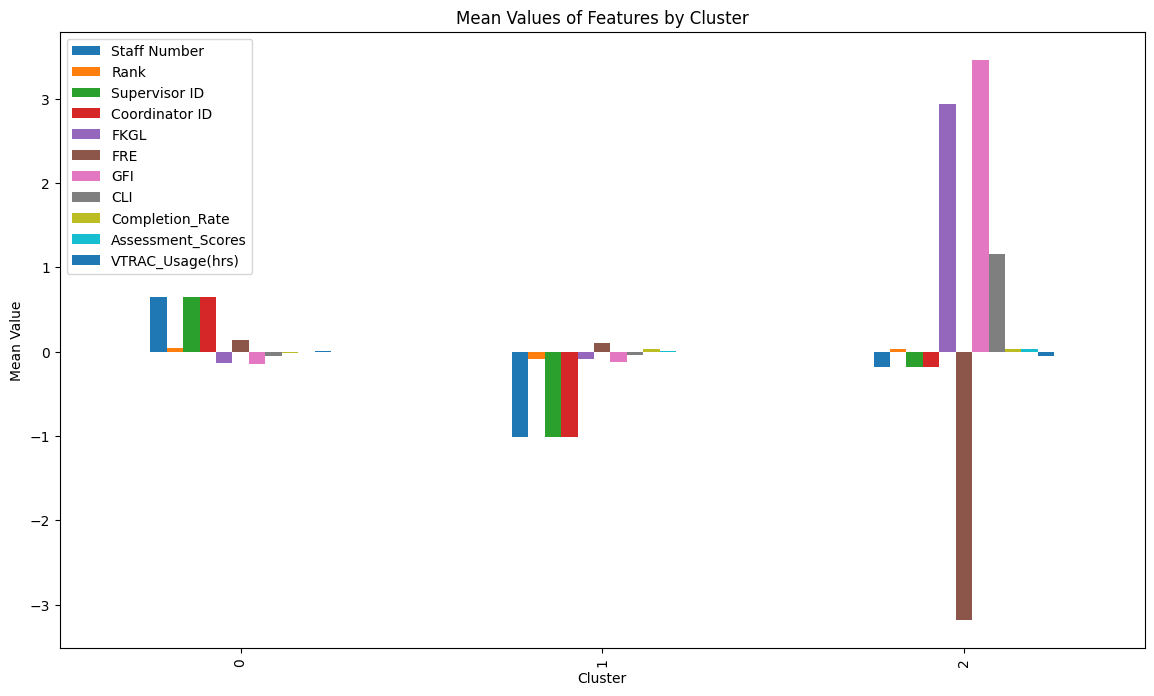

In [13]:
# Plot the mean values
cluster_means.plot(kind='bar', figsize=(14, 8))
plt.title('Mean Values of Features by Cluster')
plt.ylabel('Mean Value')
plt.show()

#4. Mean Values by Cluster:
#- Cluster 0: Higher `Completion_Rate` and `VTRAC_Usage(hrs)` suggest a highly engaged and frequent user group.
#- Cluster 1: Balanced mean values indicate average user engagement and performance.
#- Cluster 2: Higher `FKGL` and `CLI` mean values indicate users preferring complex content.

In [15]:
# Save cluster descriptions
cluster_descriptions.to_csv('cluster_descriptions.csv')

# Save cluster means
cluster_means.to_csv('cluster_means.csv')

In [ ]:
### Application of Insights

1. Personalized Recommendations:
   - Cluster 0: Recommend advanced modules and frequent usage incentives.
   - Cluster 2: Suggest content with higher readability levels.

2. Resource Allocation:
   - Allocate resources to develop content and features tailored to the specific needs of each cluster.

3. Product Development:
   - Use insights to prioritize features that enhance user engagement for the most active clusters.